# Clean Data

In [167]:
# import packages
import os
import pandas as pd
import nltk
from nltk import WhitespaceTokenizer
from nltk.corpus import stopwords
from string import punctuation as original_punct
import re
from collections import Counter
import string
from nltk.stem import WordNetLemmatizer 

# read in data
df = pd.read_excel("Data_IRS_Museum.xlsx")

In [168]:
# get name column and make lowercase
names = df["name"]
names = [str(name).lower() for name in names]

In [169]:
# word equivalents
names2 = []
for name in names:
    name = re.sub(r"\bctr\b", "center", name)
    name = re.sub(r"\bcntr\b", "center", name)
    name = re.sub(r"\bassn\b", "association", name)
    name = re.sub(r"\bassoc\b", " association", name)
    names2.append(name)

In [170]:
# remove stop words
nltk.download('stopwords')
stop_words = stopwords.words('english') + list(original_punct)
# lemmatize
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer() 
from nltk.stem import PorterStemmer
ps = PorterStemmer()

name_tokens = []
for name in names2:
    name = WhitespaceTokenizer().tokenize(name)           # tokenize
    name = filter(lambda x: x.isalpha(), name)            # remove numerics
#     name = [lemmatizer.lemmatize(w) for w in name]
    name = [ps.stem(w) for w in name]                     # used for word cloud 2
    name = [w for w in name if not w in stop_words]          
    name_tokens.append(name)
    
# string tweets together again
names = [" ".join(name) for name in name_tokens] 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ydeng\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ydeng\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Count Frequencies of Uni-and Bi-Grams

In [171]:
# keep uni and bi-grams
from nltk import bigrams 

# split the texts into tokens and bigrams
docs = ' '.join(filter(None, names))

uni_grams = WhitespaceTokenizer().tokenize(docs)
bi_grams = bigrams(uni_grams)

# compute frequency distribution for all the bigrams in the text
unigram_dict = nltk.FreqDist(uni_grams)
bigram_dict = nltk.FreqDist(bi_grams)

# print key values of bigrams, for example
for k,v in unigram_dict.items():
    print(k,v)


amaranthin 2
inc 2507
clark 10
museum 2635
okoboji 2
area 132
andiowa 1
histori 275
battl 7
fall 14
water 5
foundat 837
mound 5
scienc 72
energi 2
hancock 4
counti 352
agricultur 22
pioneer 24
villag 24
main 25
lighthous 11
hortu 1
arboretum 29
botan 55
garden 176
classic 22
motor 9
st 57
michael 4
automot 17
hall 238
fame 203
folsom 1
el 7
dorado 2
sacramento 4
histor 937
railroad 140
associ 426
north 58
spokan 4
farm 63
south 40
arizona 15
african 81
american 196
street 22
virginia 28
beer 3
tr 13
friend 244
zoo 21
kansa 14
citi 64
huntington 3
societi 838
patriot 4
edgecomb 2
veteran 131
militari 81
love 3
vintag 24
wing 14
icon 3
washington 20
contemporari 25
collector 46
montana 10
research 31
roxburi 1
trust 35
rio 3
grand 17
valley 95
sport 73
virgin 2
artist 23
manhattan 3
land 19
loretta 2
jackson 7
hollywood 8
morrow 1
antiqu 54
tractor 14
equip 8
western 25
oklahoma 14
center 420
denton 3
middl 3
georgia 18
camellia 1
piney 2
hill 31
la 23
master 13
reston 2
addisleigh 1
par

theold 1
sabl 1
israel 1
bibl 3
piano 3
coalmin 1
stevensvil 1
fagen 1
fighter 3
wwii 5
columbu 6
imagin 6
shield 2
ethridg 1
cass 1
log 4
cabin 4
claremor 1
czech 2
fred 3
kemp 1
defend 1
bois 1
ouachita 2
joan 1
waltemath 1
seafar 1
wilbarg 1
power 13
uncl 1
remu 1
eatonton 1
real 1
estat 7
havilah 1
middleton 1
paig 1
unlimit 2
caregiv 1
ida 1
well 2
nevada 10
myrtl 2
birch 1
spirit 4
steiner 1
pierson 1
open 2
wheel 7
descend 6
johnston 2
hale 3
puna 1
menno 1
falkenstein 1
tailor 1
succeed 1
sleepi 1
cat 3
lane 4
yakima 3
hound 1
greense 1
pro 2
rodeo 7
wall 1
herb 2
one 10
author 3
honor 14
warbird 10
fitch 1
steamboat 5
bottom 1
refug 1
wood 5
oley 1
booster 2
vaughn 1
hostess 1
contact 1
len 1
mobil 4
gem 5
belen 1
harvey 1
kalamazoo 2
strathglass 1
carousel 2
robbin 3
lyon 1
boundari 1
kitti 1
hensley 1
lancast 3
windmor 1
arkansa 9
p 5
livingston 2
est 1
bradford 3
brinton 2
glori 2
menil 1
utah 7
armament 1
romanian 1
ethnic 4
tank 2
sharewel 1
itali 2
festiv 3
raleigh 2
tur

elkad 1
job 1
carr 1
blackduck 1
ravena 1
coeyman 1
fowlervil 1
light 9
steinauer 1
toot 1
whistl 1
rollenhagen 1
medina 4
centuri 1
preservationist 1
warren 3
dgm 1
emeryvil 1
mighti 1
railtown 1
traci 1
deephaven 1
wykoff 1
grang 4
run 4
unadilla 1
norman 4
norcross 2
kill 1
clearwat 2
assumpt 1
clarkson 1
mae 1
herron 1
rosehil 1
carlisl 1
antelop 1
beaverhead 1
northport 2
nst 1
cooley 2
reverend 1
joel 1
hulu 1
maho 2
herndon 1
mencken 1
tailfin 1
luxembourg 1
balboa 1
doyl 1
chevra 1
thelim 1
vernacular 1
wheatley 1
freeston 1
penasco 2
charl 12
thresh 1
write 1
aienla 1
holley 2
secur 1
burlington 1
putnam 3
upper 4
bentonvil 3
mosaic 2
templar 1
developo 1
overland 2
burk 2
riverfront 2
neighborhood 6
random 1
minneapoli 2
sheldon 1
marshfield 1
miner 11
cibolo 1
reata 1
carolin 1
underwood 1
kingman 4
tomb 1
unknown 1
osgood 1
termin 1
colbert 1
landmark 2
kenosha 2
horsesho 2
pitcher 1
chickasaw 1
laguna 2
niguel 1
herrin 1
moin 3
fayett 4
townsit 1
european 1
somervil 1
arbo

radiat 1
ault 1
slave 3
dwell 1
flywheel 2
biden 1
monaca 1
burchfield 1
fontana 2
ngemba 1
mathemat 1
sloss 1
furnac 3
dequinci 2
patagonia 1
kent 2
corner 2
teach 1
motal 1
ron 1
sprigg 1
tuskege 1
airmen 1
monimo 1
zsl 1
pharaoh 1
pump 1
frauk 1
willem 1
looper 1
oulu 1
tag 1
augustin 2
warsaw 1
lewi 6
ginter 1
richardson 1
hector 1
mcallist 1
tangier 1
sandcastl 1
nlrm 1
pancak 1
liber 1
bingham 1
smithvil 2
wagner 2
hubert 1
simmon 1
finnish 2
platt 1
modi 1
sussex 1
return 1
wind 2
hayden 1
libro 1
lower 3
merion 1
fairchild 1
wiggin 1
revoc 1
harp 1
paperweight 2
kerr 2
zuni 1
fetish 1
marlborough 1
cardin 1
spellman 1
bullough 1
baltic 1
deaf 2
farley 1
histror 1
swc 1
fisherman 1
sebastian 1
joyc 2
howden 1
rex 2
samoy 1
beaux 1
ft 1
lauderdal 2
skagit 2
coven 1
toonseum 1
avon 2
carrier 1
usn 1
lso 1
tao 1
moulton 1
alburnett 1
expedit 1
aquariu 1
bancroft 2
retreat 2
joaquin 1
paleontolog 2
linden 2
edenton 1
housecat 1
romar 1
bearden 1
muscatin 1
snug 1
brewseum 1
wena 1
m

chicker 1
keyboard 1
holden 1
handweav 1
cutter 1
lodgepol 1
zlotoff 1
musix 1
malden 1
remnant 1
flyer 1
grayson 1
kellogg 1
igor 1
sikorski 1
haddock 1
santo 1
stansburi 1
tejano 1
packwood 1
ramseur 1
oversea 1
klipsch 1
hearn 1
lemoor 1
anacort 1
porcelain 1
stoog 1
middletown 1
ispac 1
fetherston 1
catalina 1
mcghee 1
journal 1
climberi 1
terrier 1
rich 1
beaverdam 1
fodic 1
snake 1
mammal 1
mermaid 1
marti 1
bechtler 1
preservationfound 1
eduardo 1
carrillo 1
tobacco 1
emerald 1
savag 1
cork 1
velaslavasay 1
panorama 1
bidwel 1
tlt 1
playseum 1
simpler 1
letcher 1
ikg 1
ford 1
pleas 1
lagrang 1
grotto 1
speleolog 1
hebbronvil 1
palett 1
movi 1
wert 1
abington 1
roland 1
curtin 1
posner 1
artship 1
gagnon 1
robin 1
birdvil 1
combant 1
rusti 1
barnett 1
cultiv 1
cpl 1
educarium 1
dar 1
newseum 1
culberson 1
hitchcock 1
cruis 1
montz 1
tast 1
scotland 1
brain 1
burner 1
homeplac 1
dymond 1
goodyear 1
mk 1
turkey 1
nmra 1
winslow 1
nvgm 1
zootast 1
ball 1
cavanaugh 1
chicagoland 1
co

In [172]:
# convert dictionaries into dfs
unigram_df = pd.DataFrame.from_dict(unigram_dict,orient='index')
bigram_df = pd.DataFrame.from_dict(bigram_dict,orient='index')

# merge and sort dfs for unigrams and bigrams
ngrams_df = pd.concat([unigram_df, bigram_df], axis=0)
ngrams_df = ngrams_df.sort_values(0, ascending = False)

print(ngrams_df.head(20))

# save to csv
ngrams_df.to_csv("uni_bi_grams_frequency_stemmed.csv")


                      0
museum             2635
inc                2507
histor              937
societi             838
foundat             837
(museum, inc)       623
(histor, societi)   561
associ              426
center              420
heritag             362
art                 356
counti              352
histori             275
(foundat, inc)      267
(societi, inc)      253
friend              244
hall                238
fame                203
(hall, fame)        199
american            196


In [173]:
# # sort dfs for unigrams, bigrams, and trigrams
# unigram_df = unigram_df.sort_values(0, ascending = False)
# bigram_df = bigram_df.sort_values(0, ascending = False)

# # save to csv
# unigram_df.to_csv("unigram_frequency.csv")
# bigram_df.to_csv("bigram_frequency.csv")


# Word Cloud

In [174]:
# create a clean version of the bigram
bigram_df["bigram"] = bigram_df.index

bigram_clean = []
for bigram in bigram_df["bigram"]:
    bigram = str(bigram)
    bigram = re.sub(r"\(", "", bigram)
    bigram = re.sub(r"\)", "", bigram)
    bigram = re.sub(r",", "", bigram)
    bigram = re.sub(r"'", "", bigram)
    bigram_clean.append(bigram)
    
bigram_df["bigram"] = bigram_clean

bigram_df

,0,bigram
"(amaranthin, inc)",1,amaranthin inc
"(inc, clark)",3,inc clark
"(clark, museum)",1,clark museum
"(museum, okoboji)",1,museum okoboji
"(okoboji, area)",1,okoboji area
...,...,...
"(inc, babbi)",1,inc babbi
"(babbi, rural)",1,babbi rural
"(rural, farm)",1,rural farm
"(farm, learn)",1,farm learn


In [175]:
# create a clean bigram dictionary
bigram_dict = dict(zip(bigram_df. iloc[:, 1], bigram_df. iloc[:, 0]))

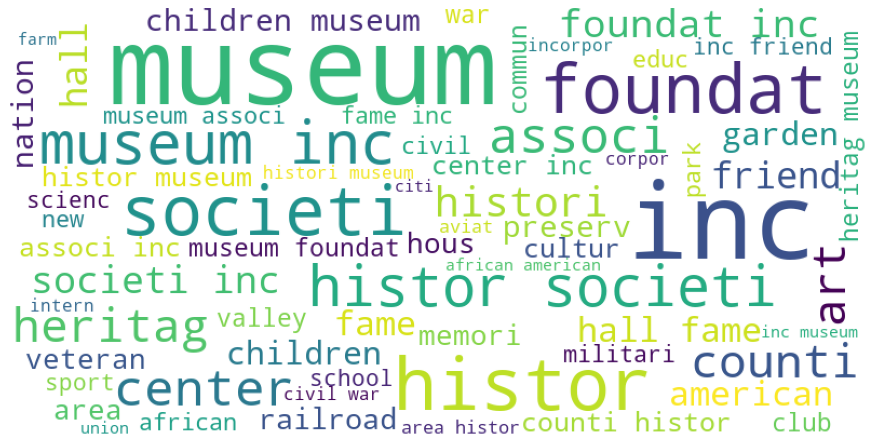

In [176]:
# import modules for word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

ngram_dict = unigram_dict.copy()
ngram_dict.update(bigram_dict)

# set specifications for word cloud
wordcloud = WordCloud(background_color='white',max_font_size = 100, min_font_size = 14, width=800, height=400).generate_from_frequencies(ngram_dict)
 
# plot the WordCloud image                      
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.savefig('word_cloud_stemmed.jpeg', dpi=500, bbox_inches='tight')
plt.show()
